In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# step 1

# Data preparation

In [2]:
dataframe=pd.read_csv("mnist/train.csv")
print(dataframe.shape)

(42000, 785)


In [3]:
dataframe.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data=dataframe.values

In [5]:
x,y=data[:,1:],data[:,0]

In [6]:
print(x.shape,y.shape)

(42000, 784) (42000,)


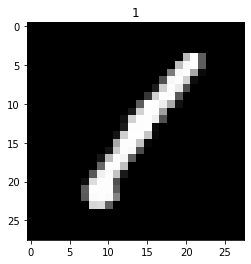

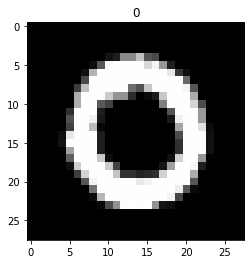

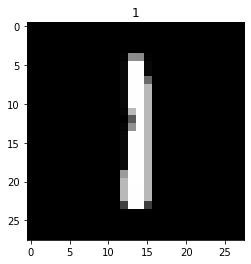

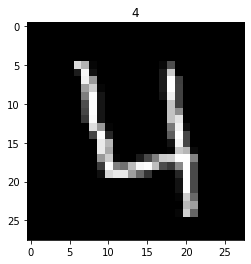

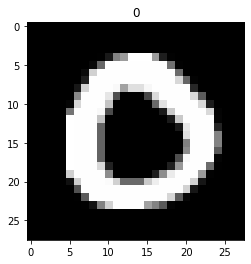

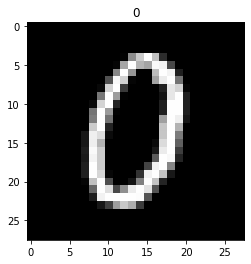

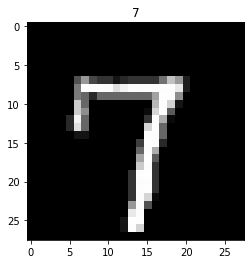

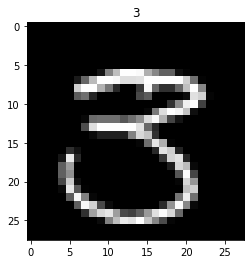

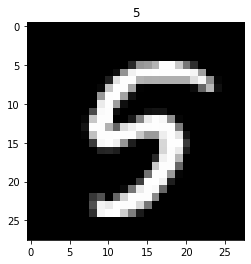

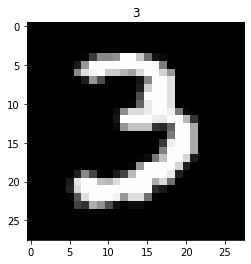

In [7]:
#visualization of the data in use
for i in range(10):
    sample_img=x[i].reshape((28,28))
    plt.imshow(sample_img,cmap='gray')
    plt.title(y[i])
    plt.show()

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [9]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((33600, 784), (33600,), (8400, 784), (8400,))

# KNN Algorithm

In [27]:
class knn:
    
    def __init__(self,x,y):
        self.x=x
        self.y=y
        
    def eucledian(self,x1,x2):  # euclidean distance between the points
        return np.sqrt(np.sum((x1-x2)**2))
    
    def dist(self,test_point,k=5):  #finding distance of all the points from  test point and nearest neighbor
        all_dist=[]
        for i,label in zip(self.x,self.y):
            d=self.eucledian(i,test_point)
            all_dist.append([d,label])
        all_dist=sorted(all_dist,key= lambda x:x[0])
        all_dist=np.array(all_dist)
        all_dist=all_dist[:5]
        
        freq_count=np.unique(all_dist[:,1],return_counts=True)
        label,count=freq_count
        nn=label[count.argmax()]
        return int(nn)
    
    def prediction(self,x_test):
        yhat=[]
        for i in x_test:
            yhat.append(self.dist(i))
        return yhat
    def accuracy(self,x_test,y_test):
        y_pred=np.array(pred.prediction(x_test))
        acc=(y_pred==y_test).sum()/y_test.shape[0]
        return acc * 100
    

# Step 3: checking on self generated test cases

In [28]:
pred=knn(x_train,y_train)

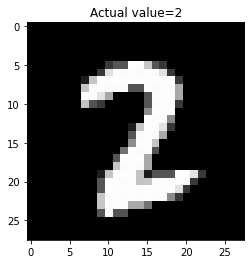

Predicted value= 2


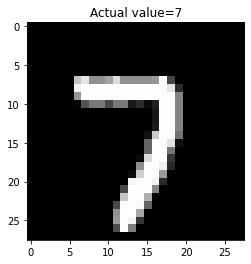

Predicted value= 7


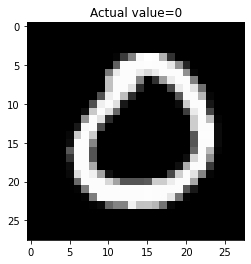

Predicted value= 0


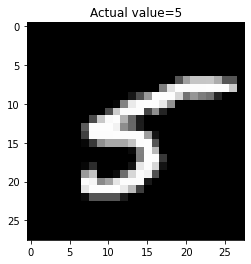

Predicted value= 5


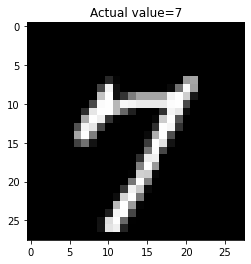

Predicted value= 7


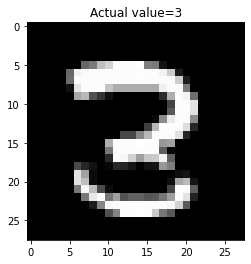

Predicted value= 3


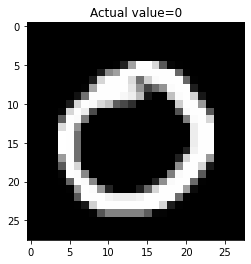

Predicted value= 0


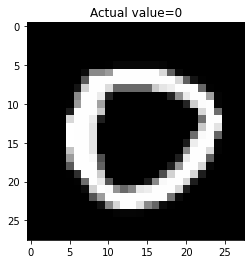

Predicted value= 0


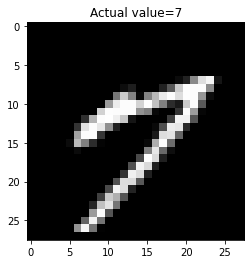

Predicted value= 7


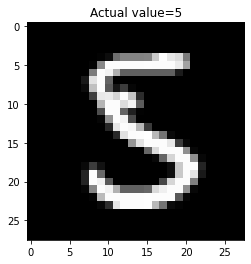

Predicted value= 5


In [29]:
for i in range(10):
    n=np.random.randint(0,x_test.shape[0])
    y_pred=pred.dist(x_test[n])
    test_img=x_test[n].reshape((28,28))
    plt.imshow(test_img,cmap='gray')
    plt.title("Actual value={}".format(y_test[n]))
    plt.show()
    print('Predicted value=',y_pred)

In [30]:
#dividing data in small batches and find accuracy of those batches

In [33]:
batch_size=50
nb=int(x_test.shape[0]/batch_size)
nb

168

In [38]:
#accuracy of 10 batches
total_acc=0
for i in range(10):
    accuracy=pred.accuracy(x_test[i*batch_size:(i+1)*batch_size],y_test[i*batch_size:(i+1)*batch_size])
    print("accuracy of {} batch ".format(i),accuracy)
    total_acc+=accuracy

accuracy of 0 batch  96.0
accuracy of 1 batch  96.0
accuracy of 2 batch  96.0
accuracy of 3 batch  98.0
accuracy of 4 batch  98.0
accuracy of 5 batch  96.0
accuracy of 6 batch  96.0
accuracy of 7 batch  96.0
accuracy of 8 batch  98.0
accuracy of 9 batch  98.0


In [39]:
score=total_acc/10
print(score)

96.8


# Given testcases

In [13]:
test_case=pd.read_csv("mnist/test.csv")

In [14]:
test_case.shape

(28000, 784)

In [15]:
test_case=test_case.values

In [16]:
#as we it is quite difficult to run on all test case we will take some random cases

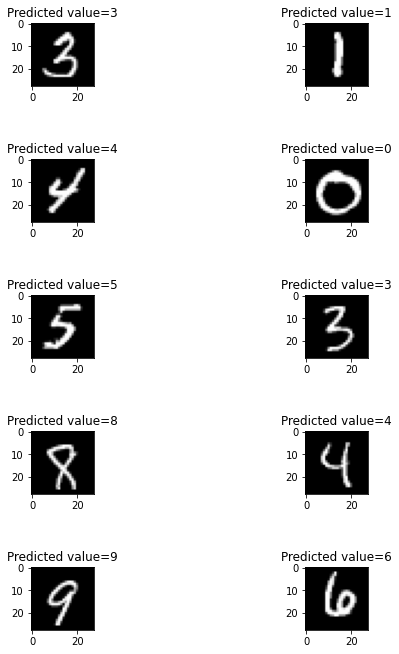

In [40]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,2,i+1)
    n=np.random.randint(0,test_case.shape[0])
    y_pred=pred.dist(test_case[n])
    test_img=test_case[n].reshape((28,28))
    plt.imshow(test_img,cmap='gray')
    plt.title('Predicted value={}'.format(y_pred))
plt.tight_layout(pad=4)
plt.show()